In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer,PolynomialFeatures
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings(action = "ignore")
from scipy.stats import f_oneway, chi2_contingency
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
from sklearn.metrics import mean_absolute_error

### Task A:

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/HousePricePrediction.csv')
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(df1.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
mean_lotfrontage = df1['LotFrontage'].mean()
df1['LotFrontage'].fillna(mean_lotfrontage, inplace=True)

# Now "LotFrontage" column should have no null values
print(df1['LotFrontage'].isnull().sum())
print(df1.isnull().sum())

0
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
# Separate features and target variable
X = df1.drop(columns=['SalePrice'])
y = df1['SalePrice']

# Selecting top correlated features with 'SalePrice'
correlation_matrix = X.corrwith(y)
top_correlated_cols = correlation_matrix.abs().sort_values(ascending=False).index[:4]
X = X[top_correlated_cols]

# Label encoding for categorical features
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Min-max scaling for numeric features
scaler = MinMaxScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Min-max scaling for the target variable
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train-test split
#x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
#x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.6, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred_linear = model1.predict(x_train)
y_test_pred_linear = model1.predict(x_test)

mse_train_linear = mean_squared_error(y_train, y_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
r2_train_linear = r2_score(y_train, y_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)

print("Linear Regression:")
print(f"Train MSE: {mse_train_linear}, R2 Score: {r2_train_linear}")
print(f"Test MSE: {mse_test_linear}, R2 Score: {r2_test_linear}")

Linear Regression:
Train MSE: 0.0031443355490225274, R2 Score: 0.7314516841885637
Test MSE: 0.0031718681087491577, R2 Score: 0.7652133266336533


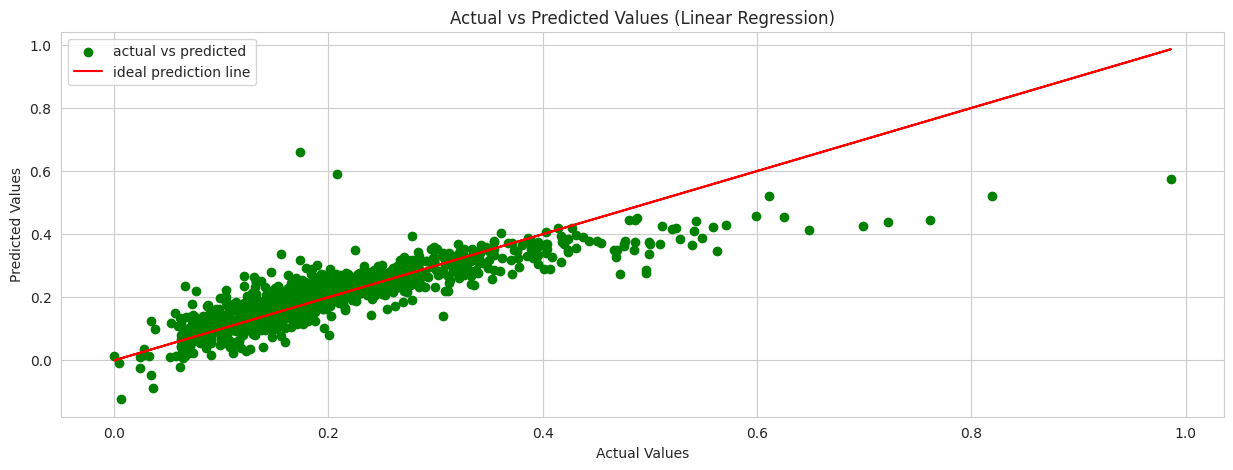

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(y_train, y_pred_linear, color='green', label="actual vs predicted")
plt.plot(y_train, y_train, color='red', label="ideal prediction line")
plt.legend()
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model2 = LinearRegression()
model2.fit(x_train_poly, y_train)
y_pred_poly = model2.predict(x_train_poly)
y_test_pred_poly = model2.predict(x_test_poly)

mse_train_poly = mean_squared_error(y_train, y_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print("\nPolynomial Regression:")
print(f"Train MSE: {mse_train_poly}, R2 Score: {r2_train_poly}")
print(f"Test MSE: {mse_test_poly}, R2 Score: {r2_test_poly}")


Polynomial Regression:
Train MSE: 0.0022525467754409465, R2 Score: 0.8076167020344895
Test MSE: 0.002423408513750632, R2 Score: 0.8206154847417111


### Task B:

### ANN for House Price Prediction

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
x_test,x_valid,y_test,y_valid = train_test_split(x_test,y_test,test_size = 0.1,random_state = 42)

In [ ]:
model = Sequential()
model.add(Dense(256,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 256)               1280      
                                                                 
 dense_172 (Dense)           (None, 128)               32896     
                                                                 
 dense_173 (Dense)           (None, 64)                8256      
                                                                 
 dense_174 (Dense)           (None, 32)                2080      
                                                                 
 dense_175 (Dense)           (None, 16)                528       
                                                                 
 dense_176 (Dense)           (None, 1)                 17        
                                                                 
Total params: 45,057
Trainable params: 45,057
Non-tra

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanSquaredError'])

In [ ]:
history1 = model.fit(x_train,y_train,epochs = 100,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/100
35/35 [==============================] - 2s 10ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7/100
35/35 [==============

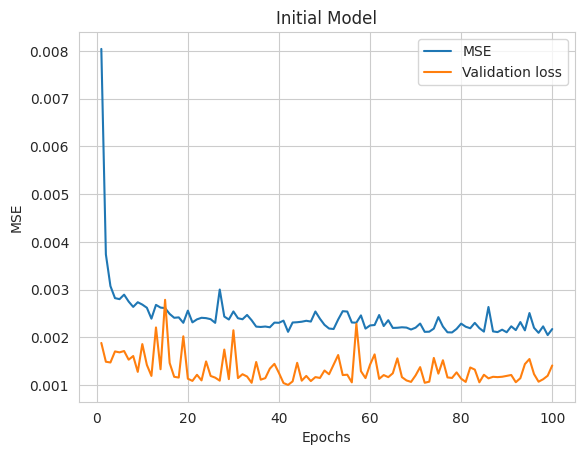

In [ ]:
mse = history1.history['mean_squared_error']
val_loss = history1.history['val_loss']

epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, label='MSE')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Initial Model')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on train and test data
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Calculate MSE for train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R2 score for train and test sets
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print("Train MSE:", train_mse)
print("Train R2 Score:", train_r2)
print("Test MSE:", test_mse)
print("Test R2 Score:", test_r2)

11/11 [==============================] - 0s 2ms/step
Train MSE: 0.0020619574801143013
Train R2 Score: 0.8238943649854331
Test MSE: 0.0024249180066436586
Test R2 Score: 0.8295139200335082


Lets try to decrease hidden layers and create another model - Model 1

In [ ]:
model1 = Sequential()
model1.add(Dense(32,input_dim=x_train.shape[1],activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [ ]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanSquaredError'])

In [ ]:
history2 = model1.fit(x_train,y_train,epochs = 50,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 7/50
35/35 [======================

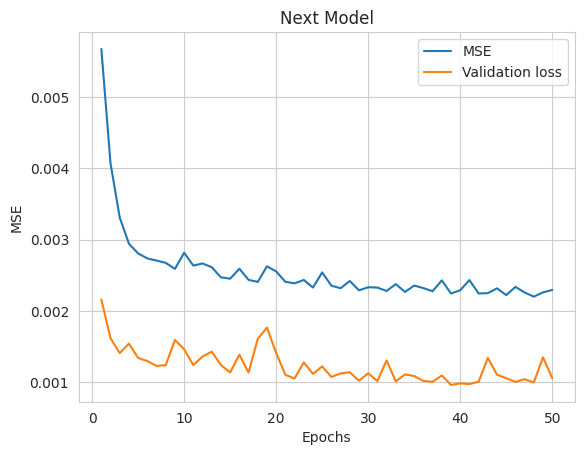

In [ ]:
mse = history2.history['mean_squared_error']
val_loss = history2.history['val_loss']

epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, label='MSE')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Next Model')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on train and test data
train_predictions = model1.predict(x_train)
test_predictions = model1.predict(x_test)

# Calculate MSE for train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R2 score for train and test sets
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print("Train MSE:", train_mse)
print("Train R2 Score:", train_r2)
print("Test MSE:", test_mse)
print("Test R2 Score:", test_r2)

11/11 [==============================] - 0s 3ms/step
Train MSE: 0.0021996666365143025
Train R2 Score: 0.8121330368935473
Test MSE: 0.002512799497431689
Test R2 Score: 0.8233353313863812


Linear Regression:

Train MSE: 0.0031443355490225274
Train R2 Score: 0.7314516841885637
Test MSE: 0.0031718681087491577
Test R2 Score: 0.7652133266336533


Polynomial Regression:

Train MSE: 0.0022525467754409465
Train R2 Score: 0.8076167020344895
Test MSE: 0.002423408513750632
Test R2 Score: 0.8206154847417111

ANN Model 0 :

Train MSE: 0.002061
Train R2 Score: 0.823894
Test MSE Score: 0.002512
Test R2: 0.823335

ANN Model 1 :

Train MSE : 0.002199
Train R2 Score: 0.812133
Test MSE: 0.0024249
Test R2 Score: 0.829513

Conclusion : The Polynomial Regression and both ANN models (Model 0 and Model 1) outperform Linear Regression in terms of lower Mean Squared Error and higher R2 scores, indicating better predictive performance on both training and test data. Among the ANN models, ANN Model 1 demonstrates superior performance compared to ANN Model 0, as evidenced by its higher R2 score and lower MSE on the test dataset

### Hearts Dataset

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/heart.csv')
df2.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(df2.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Separate features and target variable
X = df2.drop(columns=['target'])
y = df2['target']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to all columns in X
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled data and original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Train-test split
x_train, x_temp, y_train, y_temp = train_test_split(X_scaled_df, y, test_size=0.25, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.1, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(13,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_218 (Dense)           (None, 128)               1792      
                                                                 
 dense_219 (Dense)           (None, 64)                8256      
                                                                 
 dense_220 (Dense)           (None, 32)                2080      
                                                                 
 dense_221 (Dense)           (None, 16)                528       
                                                                 
 dense_222 (Dense)           (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling model
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
# fitting data into our model
history1 = model.fit(x_train,y_train,epochs = 100,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 0.6876 - accuracy: 0.5595 - val_loss: 0.6657 - val_accuracy: 0.6765
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6518 - accuracy: 0.7533 - val_loss: 0.6242 - val_accuracy: 0.8382
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6041 - accuracy: 0.7930 - val_loss: 0.5672 - val_accuracy: 0.8529
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5399 - accuracy: 0.7841 - val_loss: 0.4979 - val_accuracy: 0.8676
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4823 - accuracy: 0.7885 - val_loss: 0.4598 - val_accuracy: 0.8529
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4230 - accuracy: 0.8282 - val_loss: 0.4194 - val_accuracy: 0.8676
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4089 - accuracy: 0.8150 - val_loss: 0.4150 - val_accuracy: 0.8382
Epoch 8/100
8/8 [========

In [ ]:
def plot_function(history):
    fig,ax = plt.subplots(1,2,figsize = (25,5))
    ax[0].plot(history.history['loss'],color = 'red',label = 'train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'],color = 'orange',label = 'train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'],color = 'black',label = 'val_accuarcy')
    ax[1].legend()

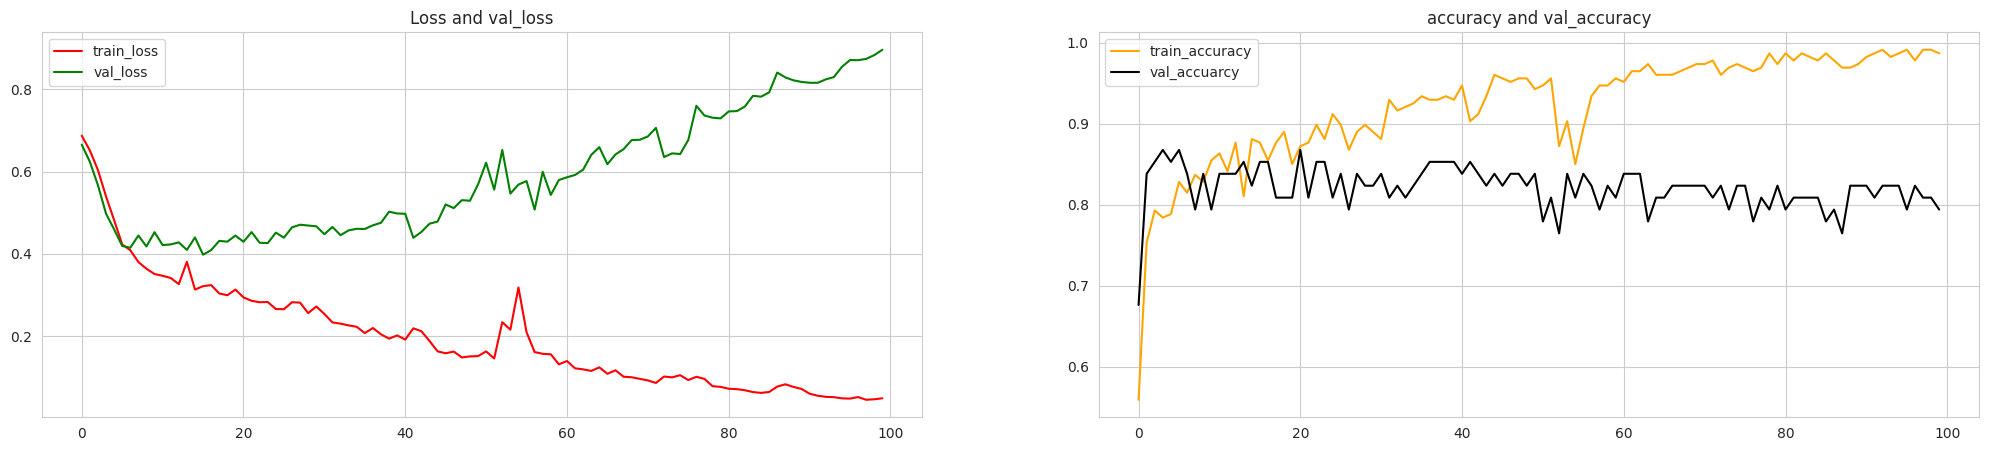

In [ ]:
plot_function(history1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on validation set
y_pred = model.predict(x_valid)
y_pred_class = (y_pred > 0.5).astype(int)

# Calculate and print metrics
accuracy = accuracy_score(y_valid, y_pred_class)
precision = precision_score(y_valid, y_pred_class)
recall = recall_score(y_valid, y_pred_class)
f1 = f1_score(y_valid, y_pred_class)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

3/3 [==============================] - 0s 6ms/step
Accuracy: 0.7941176470588235
Precision: 0.8285714285714286
Recall: 0.7837837837837838
F1-Score: 0.8055555555555555


Lets try another model

In [ ]:
model1 = Sequential()
model1.add(Dense(32, input_shape=(13,), activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_223 (Dense)           (None, 32)                448       
                                                                 
 dense_224 (Dense)           (None, 16)                528       
                                                                 
 dense_225 (Dense)           (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling model
model1.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
# fitting data into our model
history2 = model.fit(x_train,y_train,epochs = 50,batch_size = 32,validation_data = (x_valid,y_valid))

Epoch 1/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0429 - accuracy: 0.9912 - val_loss: 0.9080 - val_accuracy: 0.8088
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0470 - accuracy: 0.9868 - val_loss: 0.9207 - val_accuracy: 0.7941
Epoch 3/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0457 - accuracy: 0.9868 - val_loss: 0.9254 - val_accuracy: 0.8088
Epoch 4/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0517 - accuracy: 0.9780 - val_loss: 0.9148 - val_accuracy: 0.7794
Epoch 5/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0449 - accuracy: 0.9912 - val_loss: 0.9543 - val_accuracy: 0.8088
Epoch 6/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0845 - accuracy: 0.9604 - val_loss: 1.0230 - val_accuracy: 0.7500
Epoch 7/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0682 - accuracy: 0.9736 - val_loss: 0.9463 - val_accuracy: 0.8088
Epoch 8/50
8/8 [===========

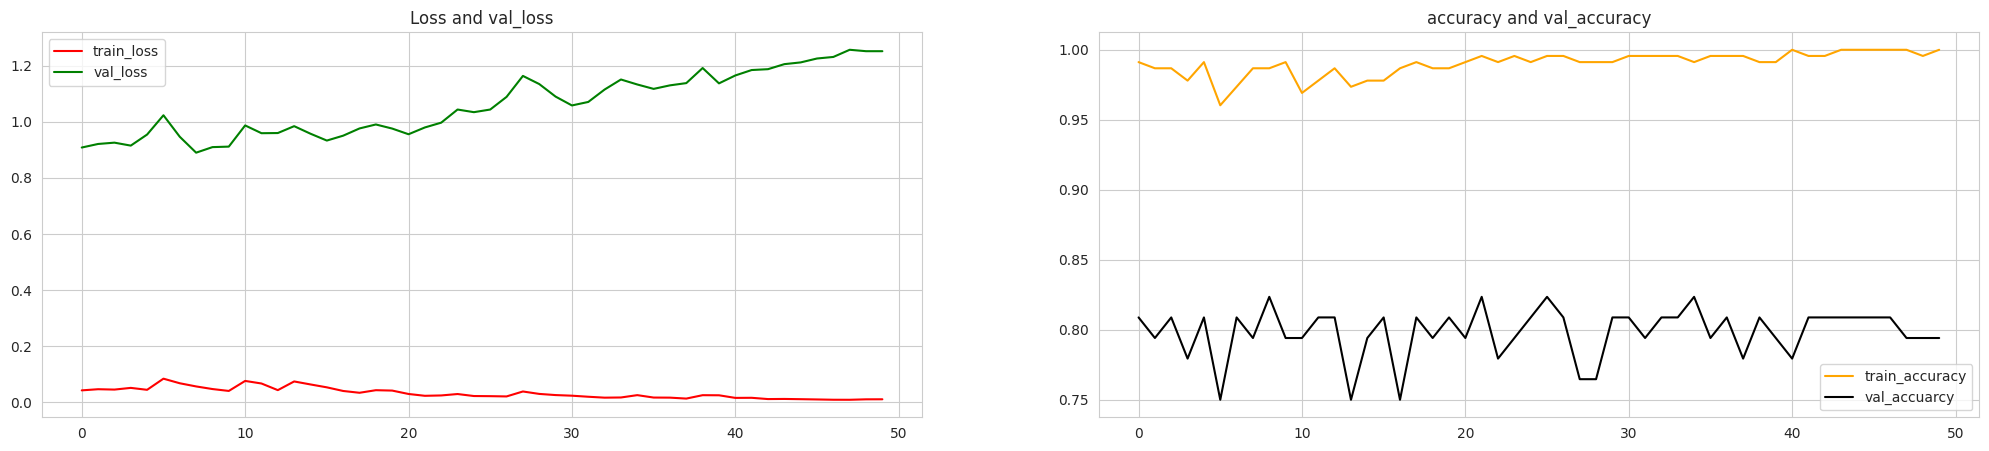

In [ ]:
plot_function(history2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on validation set
y_pred = model.predict(x_valid)
y_pred_class = (y_pred > 0.5).astype(int)

# Calculate and print metrics
accuracy = accuracy_score(y_valid, y_pred_class)
precision = precision_score(y_valid, y_pred_class)
recall = recall_score(y_valid, y_pred_class)
f1 = f1_score(y_valid, y_pred_class)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


3/3 [==============================] - 0s 6ms/step
Accuracy: 0.7941176470588235
Precision: 0.8108108108108109
Recall: 0.8108108108108109
F1-Score: 0.8108108108108109


Model 0

Accuracy: 0.7941176470588235
Precision: 0.8285714285714286
Recall: 0.7837837837837838
F1-Score: 0.8055555555555555


Model 1:

Accuracy: 0.7941176470588235
Precision: 0.8108108108108109
Recall: 0.8108108108108109
F1-Score: 0.8108108108108109


 Conclusion : Model 0 appears to have a slightly higher precision, indicating that it makes fewer false positive errors compared to Model 1. However, Model 1 has a higher recall and F1-Score, suggesting that it captures a larger proportion of actual positive cases while maintaining a better balance between precision and recall. Therefore, if the problem requires minimizing false positives and achieving a better overall balance, Model 1 might be considered better.